# XP Exercises - Inferential statistics with regression

As stated in the instructions, please complete the code when you see a "##TODO"


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_1samp


In [2]:
## TODO : load the dataset in a dataframe called d1, that you can find here : https://www.kaggle.com/code/youssefelzahar/inferential-statistics/input?select=air+traffic.csv

d1 = pd.read_csv('/content/air traffic.csv')
d1.head()


,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20
1,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31
2,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12
3,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02
4,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07


# Columns Description

* Dom_Pax : Domestic Air Travel Passengers
* Int_Pax : International Air Travel Passengers
* Pax : Total Air Travel Passengers
* Dom_Flt : Number of Flights (Domestic)
* Int_Flt : Number of Flights (International)
* Flt : Number of Flights (Total)
* Dom_RPM : Revenue Passenger-miles (Domestic)
* Int_RPM : Revenue Passenger-miles (International)


In [3]:
## TODO: Check the summary of the DataFrame to see its structure and data types.

d1.info()

# remove all commas from the dataframe
d1 = d1.replace(',','', regex=True)

# there are many 'object' type columns that should be numeric
d1 = d1.apply(pd.to_numeric)
d1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #  

# Inferential statistics

We will perform the following :

1. Linear Regression

2. Hypothesis testing




# Linear and Multiple Regression

The best linear line describe the correlation between two variables.

We have two types:

1. linear Regression
2. Multiple Regression

The equation of regression

**w=a+(b*x)**

**w=predict variable**(The point of intersection of the x axis and the y axis)

**a=intercept**(The point of intersection of the regression and the y axis)

**b=slope**(The amount of increase in regression relative to the x-axis)

# Linear Regression

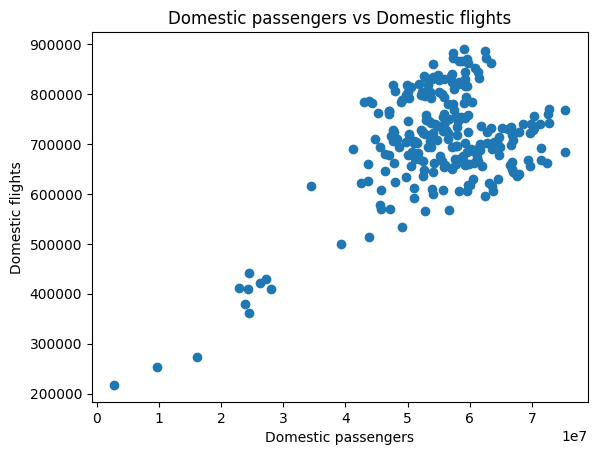

In [4]:
## TODO: Explore the relationship between domestic passengers and domestic flights.

# ploting
plt.scatter(d1['Dom_Pax'], d1['Dom_Flt'])
plt.xlabel('Domestic passengers')
plt.ylabel('Domestic flights')
plt.title('Domestic passengers vs Domestic flights')
plt.show()

# according to the graph, we can see that there is a positive linear relationship between domestic passengers and domestic flights.
# when there are more passengers, there are more flights.


In [5]:
## TODO: Perform a linear regression between domestic passengers and domestic flights, and create a prediction model.

X = d1[['Dom_Pax']]  # only one feature
y = d1['Dom_Flt']

# create a prediction model based on our data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)  # train the model
y_pred = model.predict(X_test)  # make predictions


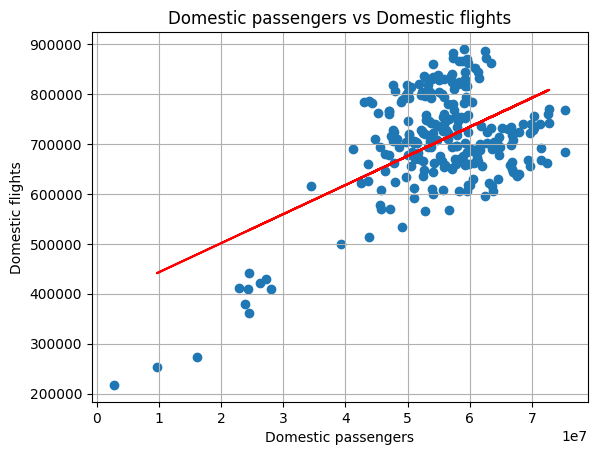

In [6]:
## TODO: Plot the scatter plot of domestic passengers versus domestic flights, and overlay the linear regression line.

# we scatter plot all the data
plt.scatter(X, y)

# plot the predicted values - so we get a straight line - becasue it's a linear regression model
plt.plot(X_test, y_pred, color='red')

plt.xlabel('Domestic passengers')
plt.ylabel('Domestic flights')
plt.title('Domestic passengers vs Domestic flights')
plt.grid()
plt.show()


In [7]:
## TODO: Print the slope, intercept, p-value, standard error, and the predicted value for 100 domestic passengers.

# get the slope, intercept, p-value, and standard error for the linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(X.squeeze(), y)  # squeeze() to convert a DataFrame to a Series

print('Slope:', slope)
print('Intercept:', intercept)
print('P-value:', p_value)
print('Standard error:', std_err)

# the predicted value for 100 domestic passengers
print('Predicted value for 100 domestic passengers:', int(slope * 100 + intercept))


Slope: 0.005506132716515946
Intercept: 402758.72082950146
P-value: 5.3156895585332156e-20
Standard error: 0.000550385239973366
Predicted value for 100 domestic passengers: 402759


# The coefficient of correlation

The relationship between the values on the x-axis and the y-axis determines whether linear regression can be used for prediction. If there is no relationship, linear regression is not suitable for making predictions.

The correlation coefficient (r) ranges from -1 to 1. A value of 0 indicates no relationship, while values close to 1 or -1 signify a strong positive or negative relationship, respectively, with a perfect correlation at either end.

In [8]:
## TODO: Print the slope, intercept, p-value, standard error, and the predicted value for 100 domestic passengers.

# This paragraph is about The coefficient of correlation (r-value)

# we already have the value
print('R-value:', r_value)


R-value: 0.5369864170525395


# Linear Regression


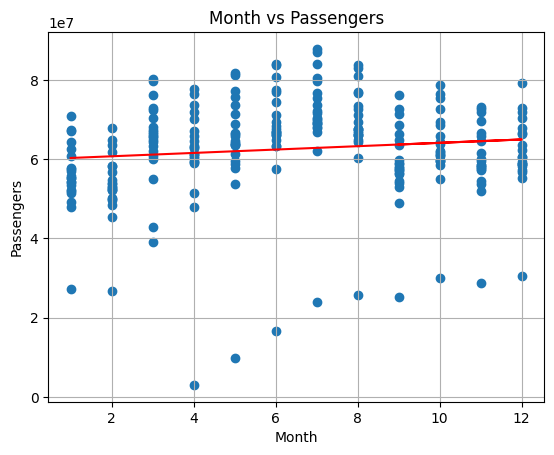

Slope: 424567.8255840645
Intercept: 59865247.220632836
R²: 0.014140521194681644
P-value: 0.06097982222176572
Standard error: 225565.87763717424


In [9]:
## TODO: Calculate linear regression parameters

# we will examine the relationship between the month and the number of passengers
X = d1['Month']
y = d1['Pax'] # the target

## TODO:  Define the function for the linear model
def linear_model(x):
    y = slope * x + intercept
    return y

## TODO:  Apply the model to the 'Month' data
# get the slope, intercept, p-value, and standard error for the linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)


## TODO:  Plot the scatter plot and the regression line
plt.scatter(X, y)
plt.plot(X, linear_model(X), color='red')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Month vs Passengers')
plt.grid()
plt.show()


# Results
print('Slope:', slope)
print('Intercept:', intercept)
print("R²:", r_value**2)
print('P-value:', p_value)
print('Standard error:', std_err)


In [10]:
## TODO: Print r2

print("R²:", r_value**2)


R²: 0.014140521194681644


**Now Let's using ScikitLearn (Linear regression) to predict the value of y by using values of x**


In [11]:
## TODO: Prepare the data X and y for regression by reshaping the features using .reshape(-1,1)

# we will do the exact same thing but with the ScikitLearn (Linear regression)

X = d1['Month'].values.reshape(-1, 1)
y = d1['Pax'].values.reshape(-1, 1)


In [12]:
## TODO: Split the data into training and validation sets.

# create a prediction model based on our data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [13]:
## TODO: Fit the linear regression model, make a prediction, and evaluate the model.

model = LinearRegression()
model.fit(X_train, y_train)  # train the model

#  evaluate the regression model
y_pred = model.predict(X_test)  # make predictions on our test data
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))    # evaluate the model based on the predictions

# The MSE result is a very large number

# make a prediction
an_input = X_test[[0]]  # we take only one input - only as an example
y_pred = model.predict(an_input)  # make only one prediction - only as an example


Mean Squared Error: 131649097122322.03


In [14]:
## TODO: Print the prediction for the given input.

print(f'Prediction for the given input {an_input} is: {y_pred}')


Prediction for the given input [[8]] is: [[62679189.52122264]]


The Mean Squared Error (MSE) measures how well a regression line fits a set of data points by calculating the average of the squared differences between the observed values and the predicted values.

The formula for MSE is:

MSE=(1/n)*sum(yi-yhati)^2

yi=observed values

yhat=predict value

MSE quantifies the error between the observed and predicted values, with smaller values indicating better model accuracy.

In [15]:
## TODO: Calculate the mean squared error (MSE) for the training set.

print(mean_squared_error(X_train, y_train))


3983903425927795.5


What do you think ?

####The MSE result is a very large number, indicating that the model is not performing well on our training data.
####It will not be able to make accurate predictions.

# Multiple Regression

Multiple regression is a statistical technique used to model the relationship between one dependent variable and two or more independent variables. This allows us to understand how multiple predictors influence a single outcome.

The general formula for multiple regression is:

y=β0+β1x1+β2x2+⋯+βpxp+ϵ


Where:

* y is the dependent (or response) variable,
* x1​,x2​,…,xp​ are the independent (predictor) variables,
* β0​ is the intercept,
* pβ1​,β2​,…,βp​ are the regression coefficients for each independent variable,
* ϵ is the error term.

the goal is to estimate the coefficients (β) that minimize the error between the predicted and actual values of the dependent variable.

In [16]:
## TODO: Reshape the features mx and target variables my .

# Multiple Regression is just a linear regression model that uses more than one feature to make predictions.

# We will examine the number of passengers and the number of flights, comparing to the month.

mx = d1[['Pax', 'Flt']]  # the features
my = d1['Month']  # the target


In [17]:
## TODO: Split the features and target variables into training and validation sets.

X_train, X_test, y_train, y_test = train_test_split(mx, my, test_size=0.3, random_state=1)


In [18]:
## TODO: Fit the multiple regression model and calculate the R^2 score on the training data using .score

model = LinearRegression()
model.fit(X_train, y_train)  # train the model

# calculate the R² score on the training data
R2 = model.score(X_train, y_train)
print('R^2 score on the training data: ', R2)


R^2 score on the training data:  0.01954858884562216


In [19]:
## TODO: Print the target values

print(my)


0      1
1      2
2      3
3      4
4      5
      ..
244    5
245    6
246    7
247    8
248    9
Name: Month, Length: 249, dtype: int64


In [21]:
## TODO: Make a prediction using the multiple regression model.

# make a prediction
an_input = X_test.iloc[[0]]  # we take only one input - only as an example
y_pred = model.predict(an_input)  # make only one prediction - only as an example

print(f'Prediction for the given input is: {y_pred}')


Prediction for the given input is: [6.4455915]


# Hypothesis testing

Hypothesis testing is a systematic procedure used to evaluate whether the results of a research study support a particular theory or assumption about a population. It helps determine if there is enough evidence to reject or fail to reject a hypothesis based on sample data.

**we have two types**

1. The null hypothesis H0, represents the idea that there is no effect, relationship, or difference in the population. It serves as the baseline assumption that any observed effect in the data is due to chance.

Example: "There is no significant difference in test scores between two groups."

2. The alternative hypothesis Ha suggests that there is an effect, relationship, or difference in the population. It is what researchers typically aim to support with their data.

Example: "There is a significant difference in test scores between two groups."

In hypothesis testing, we aim to gather enough evidence from the sample to either reject the null hypothesis (H0H0​) in favor of the alternative hypothesis (HaHa​), or fail to reject the null hypothesis, indicating that there isn't sufficient evidence for the alternative hypothesis.


# Null hypothesis

The null hypothesis (H0H0​) is a statement that there is no significant difference or effect in the population. It assumes that any observed differences in the sample are due to random chance.

In hypothesis testing, the decision to reject or fail to reject the null hypothesis is based on the p-value.

If :
* p ≤ 0.05: Reject H0H0​ (evidence supports HaHa​).
* p > 0.05: Fail to reject H0H0​ (no evidence to support HaHa​).

# Alternative hypothesis Ha

The alternative hypothesis (HaHa​) is a statement in statistical hypothesis testing that suggests there is a significant difference, effect, or relationship in the population, contrary to the null hypothesis (H0H0​).

In other words, HaHa​ proposes that the observed data is not due to random chance, and there is some true effect or difference in the population that can be detected.

For example:

- Null Hypothesis (H0​): There is no significant difference in test scores between two groups.
- Alternative Hypothesis (Ha​): There is a significant difference in test scores between the two groups.

The goal of hypothesis testing is to gather enough evidence to reject the null hypothesis in favor of the alternative hypothesis, suggesting that the observed effect or difference is statistically significant.

In [ ]:
## (Optional) TODO: Perform hypothesis testing for two variables of your choice

# One sample test

is used to compare the diffrence between sample and population mean

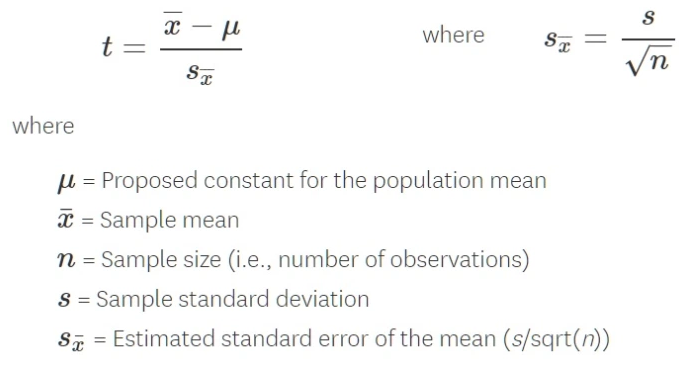

In [22]:
## TODO: Calculate the population mean of the "Year" column.

popmean = d1['Year'].mean()

print(popmean)


2012.879518072289


In [23]:
# let's take sample from data

sample=np.random.choice(d1["Year"],50)

In [24]:
sample

array([2021, 2016, 2018, 2010, 2008, 2017, 2012, 2016, 2015, 2011, 2007,
       2008, 2003, 2018, 2019, 2021, 2007, 2006, 2011, 2005, 2010, 2008,
       2012, 2005, 2005, 2005, 2011, 2014, 2018, 2023, 2007, 2005, 2008,
       2010, 2003, 2014, 2023, 2012, 2011, 2022, 2015, 2021, 2017, 2018,
       2012, 2013, 2009, 2020, 2009, 2013])

In [25]:
## Perform a one-sample t-test to compare the sample mean with the population mean.
ttest,p_value=ttest_1samp(sample,popmean)


In [26]:
ttest

-0.551101327511916

In [27]:
sample.mean()

2012.44

In [28]:
## TODO: Perform hypothesis testing based on the p-value.

alpha = 0.05  # significance level

print("P-value is: ", p_value)

if p_value <= alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

# The p-value is not less than the significance level, so we fail to reject the null hypothesis.
# This means that the sample mean is not significantly different from the population mean.


P-value is:  0.5840685010010294
Fail to reject the null hypothesis


# Two sample test

it is a statistical test used to compare the means of two independent groups to determine if there is a statistically significant difference between them. It is commonly employed when researchers want to assess whether the mean values of a particular variable differ between two distinct groups.

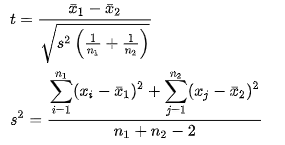

In [29]:
## TODO: Randomly select a sample of 50 from the "Flt" column.

sample_a = np.random.choice(d1["Flt"], 50)


In [30]:
## TODO: Randomly select a sample of 50 from the "Dom_Pax" column.

sample_b = np.random.choice(d1["Dom_Pax"], 50)


In [31]:
## TODO: Perform an independent t-test between `sample_a` and `sample_b` to compare their means.

ttest, p_value = stats.ttest_ind(sample_a, sample_b)


In [32]:
if p_value <=0.05:
    print("rejected null hypothesis",p_value)
else:
    print("accepted null hypothesis",p_value)

rejected null hypothesis 2.3976221158041694e-58


# Type| & Type ||

Reject the null hypothesis when it’s actually true (Type I error)

Reject the null hypothesis when it’s actually false (Correct)

Fail to reject the null hypothesis when it’s actually true (Correct)

Fail to reject the null hypothesis when it’s actually false (Type II error)

![](https://miro.medium.com/v2/resize:fit:828/format:webp/0*JM4fxEI__jX5f4Oy)